# Aprendizaje Supervisado
# Clasificación Parte 1
## Nicolás Salusso - 10710

#### 1) Se declara la variable **random_state** que contiene mi número de alumno. 

In [1]:
random_state = 14

#### 2) Se seleccionan los siguientes clasificadores a implementar:
- Support Vector Machine. 
- Random Forest.

Se importa el dataset a utilizar

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

Se normalizan los features.

In [3]:
from sklearn.preprocessing import scale

X_norm = scale(X)

2.1 Implementación de Support Vector Machine (SVM). Para este caso se utilizó SVC que se especificó para clasificadores.

In [4]:
from sklearn.svm import SVC

clf = SVC(random_state=random_state)

2.1.1 Se divide el subgrupo de Train y Test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=random_state, test_size=0.3)

2.1.2 Se entrena el modelo

In [6]:
print(clf.fit(X_train, y_train))
y_hat = clf.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=14, shrinking=True,
  tol=0.001, verbose=False)


2.1.3 Se obtiene la tasa de aciertos, recall y precision del clasificador

In [7]:
from sklearn import metrics
cr_SVC = metrics.classification_report(y_test, y_hat)
prf_SVC = metrics.precision_recall_fscore_support(y_test, y_hat)
print('Porcentaje de aciertos en la clasificación: {}\n\n{}'.format(clf.score(X_test, y_test), cr_SVC))

Porcentaje de aciertos en la clasificación: 0.9777777777777777

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        51
          1       0.93      1.00      0.96        41
          2       0.98      0.98      0.98        46
          3       1.00      0.98      0.99        51
          4       0.89      0.98      0.93        55
          5       1.00      1.00      1.00        49
          6       1.00      1.00      1.00        50
          7       1.00      0.94      0.97        62
          8       1.00      0.92      0.96        59
          9       0.99      1.00      0.99        76

avg / total       0.98      0.98      0.98       540



2.2 Implementación de Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=random_state, n_estimators=200)

2.2.1 Se divide el subgrupo de Train y Test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=random_state, test_size=0.3)

2.2.1 Se entrena el modelo y se obtiene el *y_hat*

In [10]:
print(clf.fit(X_train, y_train))
y_hat = clf.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=14,
            verbose=0, warm_start=False)


2.2.3 Se obtiene la tasa de aciertos, recall y precision del clasificador

In [11]:
from sklearn import metrics
cr_random = metrics.classification_report(y_test, y_hat)
prf_random = metrics.precision_recall_fscore_support(y_test, y_hat)
print('Porcentaje de aciertos en la clasificación: {}\n\n{}'.format(clf.score(X_test, y_test), cr_random))

Porcentaje de aciertos en la clasificación: 0.9740740740740741

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        51
          1       0.89      1.00      0.94        41
          2       1.00      1.00      1.00        46
          3       0.96      0.98      0.97        51
          4       0.98      0.98      0.98        55
          5       1.00      0.98      0.99        49
          6       1.00      0.98      0.99        50
          7       0.97      1.00      0.98        62
          8       0.98      0.92      0.95        59
          9       0.97      0.95      0.96        76

avg / total       0.98      0.97      0.97       540



### 3) Explicación paso a paso de la implementación:

El paso a paso se describió en el punto anterior. 
#### Aclaraciones:
- **SVC**: se utilizó el clasificador por defecto y solo se le modificó el parámetro *random_state*.
- **RandomForestClassifier**: se modificó el parámetro *random_state* y *n_estimators*, este último para que se obtenga un mejor resultado al momento de predecir.

#### Comparación

Comparación de precision


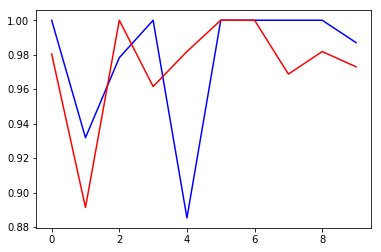

In [12]:
import matplotlib.pyplot as plt

plt.plot(digits.target_names, prf_SVC[0], 'b-',  label='SVC')
plt.plot(digits.target_names, prf_random[0], 'r-', label='RandomForest')
print('Comparación de precision')
plt.show()

Comparación de recall


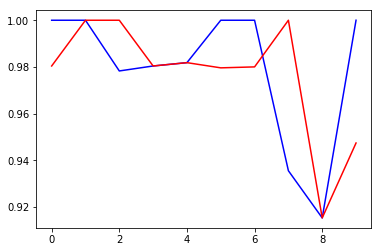

In [13]:
plt.plot(digits.target_names, prf_SVC[1], 'b-', digits.target_names, prf_random[1], 'r-')
print('Comparación de recall')
plt.show()

Comparación de f1-score


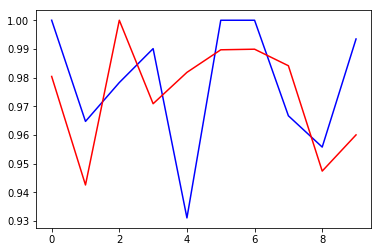

In [14]:
plt.plot(digits.target_names, prf_SVC[2], 'b-', digits.target_names, prf_random[2], 'r-')
print('Comparación de f1-score')
plt.show()

Viendo los gráficos y teniendo en cuenta los valores que arrojaron las tasas de aciertos en ambos casos. Se puede determinar que los modelos no son similares, pero tienen casi la misma tasa. 
Tampoco se puede determinar si uno fue mejor que otro porque la variación de esta es pequeña. 
Para **Random Forest** se alcanzaron grandes aciertos por la cantidad de estimadores que se le asignaron (200). 
Para **SVC** puede que la distribucion de los datos influenció de manera positiva a este método. 

FIN